## Import packages and load the dataset:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/BostonData_10_10_2021.csv')

In [22]:
df.head()

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,lat,long
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,36500.00,390.0,2021-01-28 11:29:26,2021-07-28 00:00:00,...,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392,0303807000,42.359190,-71.052924
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.00,429.0,2011-11-04 11:04:58,2012-05-04 00:00:00,...,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268,2012032000,42.260750,-71.149610
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,5000.00,70.0,2020-06-01 14:08:47,,...,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,113443,0202837000,42.375243,-71.057585
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,74295.75,803.0,2019-11-13 13:38:56,2020-05-13 00:00:00,...,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994,0402558000,42.340600,-71.080250
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.00,206.0,2013-01-03 14:13:09,2013-07-03 00:00:00,...,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,02135,149852,2204944000,42.344600,-71.154050


## Drop columns that will not be used:

In [23]:
drop_cols = ["applicant",
            "declared_valuation",
            "total_fees",
            "issued_date",
            "expiration_date",
            "occupancytype",
            "owner",
            "sq_feet",
            "property_id",
            "parcel_id",
            "status",
            "address",
            "city",
            "state",
            "zip",
            "lat",
            "long"]
df.drop(drop_cols, inplace=True, axis=1)
df.head()

,permitnumber,worktype,permittypedescr,description,comments
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...


## Check if there are any duplicate permits:

In [24]:
data_size = df.shape[0]
print(f"Number of records before removing duplicates: {data_size}")
df.drop_duplicates(subset=['permitnumber'])
data_size_after_drop = df.shape[0]
removed = data_size - data_size_after_drop
print(f"Removed {removed} duplicates.")

Number of records before removing duplicates: 518341
Removed 0 duplicates.


## Replace empty values with NaN and display rows that have NaN values

In [25]:
df = df.replace(' ', np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

,permitnumber,worktype,permittypedescr,description,comments
109,COO109004,NaN,Certificate of Occupancy,NaN,(8) Apartmentsalt 54792 issued 5/17/2011
110,A1024559,NaN,Amendment to a Long Form,NaN,Amendment to ALT927804. Interior renovations t...
242,A1055057,NaN,Amendment to a Long Form,NaN,Replacement of exterior window and strorefront...
403,A1109515,NaN,Amendment to a Long Form,NaN,Webber Shandwick - 14th floor tenant renovatio...
404,A1109515,NaN,Amendment to a Long Form,NaN,Webber Shandwick - 14th floor tenant renovatio...
...,...,...,...,...,...
513609,SF971069,NaN,Short Form Bldg Permit,NaN,(exterior sign exchange) Remove existing price...
514760,SF980107,NaN,Short Form Bldg Permit,NaN,*At Risk - Work to Rough. Add 2 shed dormers t...
516821,SF998385,NaN,Short Form Bldg Permit,NaN,Repair and rebuild existing front;3 story deck...
517062,U491003839,NaN,Use of Premises,NaN,Add 80 seats to the outdoor seating only. No o...


## Drop rows where at least one element is missing

In [26]:
df.dropna()

,permitnumber,worktype,permittypedescr,description,comments
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...
...,...,...,...,...,...
518336,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...
518337,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...
518338,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...
518339,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...


## Display the count for each permit type

In [27]:
df['permittypedescr'].value_counts()

Short Form Bldg Permit          139628
Electrical Permit               108725
Plumbing Permit                  69424
Gas Permit                       51438
Electrical Low Voltage           42117
Long Form/Alteration Permit      34403
Electrical Fire Alarms           28342
Certificate of Occupancy         18447
Excavation Permit                10814
Electrical Temporary Service      7134
Amendment to a Long Form          3933
Erect/New Construction            2561
Use of Premises                   1285
Foundation Permit                   90
Name: permittypedescr, dtype: int64

## Data Graphs

<AxesSubplot:title={'center':'Permit Type Distribution'}, ylabel='Type Count'>

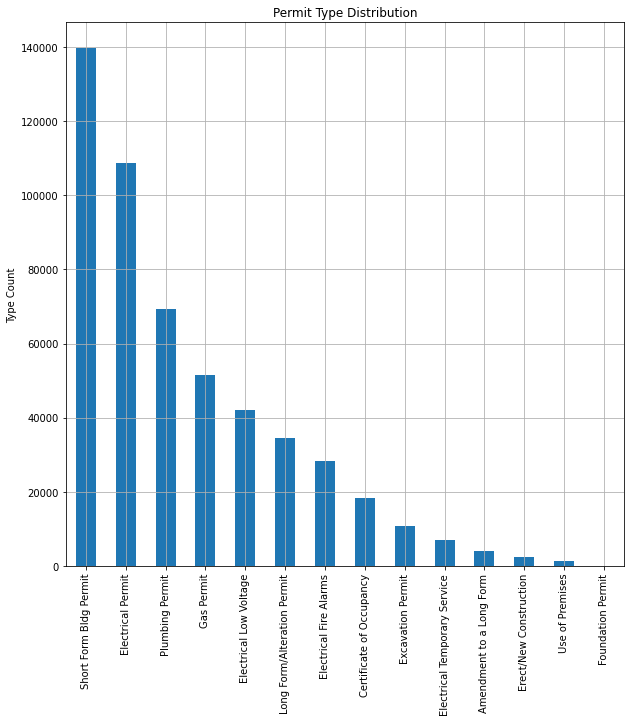

In [28]:
df['permittypedescr'].value_counts().plot.bar(figsize=(10,10), grid=True, title='Permit Type Distribution', ylabel='Type Count')

# ML Playground

## Grab X data

In [29]:
X = df.drop(columns=['permittypedescr'])
X.head()

,permitnumber,worktype,description,comments
0,A1000569,INTEXT,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...
1,A100071,COB,City of Boston,Change connector link layout from attached enc...
2,A1001012,OTHER,Other,Amend Alt943748 to erect a roof deck as per pl...
3,A1001201,INTEXT,Interior/Exterior Work,Build steel balcony over garden level with sta...
4,A100137,EXTREN,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...


In [30]:
X_comments = df.drop(columns=['permittypedescr','permitnumber', 'worktype', 'description'])
X_comments.head()

,comments
0,This work is to Amend Permit ALT347244. Elimin...
1,Change connector link layout from attached enc...
2,Amend Alt943748 to erect a roof deck as per pl...
3,Build steel balcony over garden level with sta...
4,Landscaping/stonework - amending permit #2801/...


## Grab y data (Labels)

In [31]:
y = df.permittypedescr
y.head()

0    Amendment to a Long Form
1    Amendment to a Long Form
2    Amendment to a Long Form
3    Amendment to a Long Form
4    Amendment to a Long Form
Name: permittypedescr, dtype: object

## Export X and X_comments and y data to CSV

In [33]:
X.to_csv(path_or_buf='../datasets/X_BostonDataSet.csv', index=False)

In [34]:
X_comments.to_csv(path_or_buf='../datasets/X_comments_BostonDataSet.csv', index=False)

In [35]:
y.to_csv(path_or_buf='../datasets/y_BostonDataSet.csv', index=False)